# Projeto 2 - FIFA 19 Rating Prediction

Thiago Lopes David

Thiago Maitan Pegorer

## Introdução


* O que eh o fifa 2019?

O FIFA 2019 é o jogo eletronico de futebol mais famoso nos dias de hoje. Desenvolvido pela EA Sports e publicado no fim de 2018, esse jogo oferece diversos modos de jogos para seu usuario, de modo a tornar a experiencia cada vez mais realista. Para que isso seja possivel, a EA Sports se preocupa bastante com a producao dos jogadores do jogo, dando Ratings a cada um deles de acordo com suas qualidades na vida real. Esses ratings sao a media de cada atributo dado ao jogador especifico, e quanto maior essa media, melhor se torna o jogador no jogo.

* Qual o objetivo do projeto?

Nesse projeto, seré estudado se eé possivel prever os Ratings dos jogadores para os proximos anos, baseado em Ratings passados. Para isso, sera analisado uma planilha que contem os bancos de dados de todos o jogadores do Fifa 19, ou seja, todos os atributos dados, a cada jogador.

## Minerando dados e Características do Dataset

* Importando bibliotecas

In [105]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

* Lendo dataset

In [106]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/thiagopegorer/Documents/Insper/3 semestre/Ciencia dos Dados/FIFA_Rating_P2


In [107]:
fifa = pd.read_csv("data.csv")

In [108]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [109]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [110]:
fifa_df=fifa[["Name","Age",'Nationality','Overall', 'Potential','Club', 'Wage','Preferred Foot','Position','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,Position,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€565K,Left,RF,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€405K,Right,ST,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€290K,Right,LW,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€260K,Right,GK,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€355K,Right,RCM,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [111]:
fifa_df.loc[:,"Wage"]=pd.to_numeric(fifa_df["Wage"].str.slice(start=1,stop= -1))*1000
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,Position,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,565000.0,Left,RF,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,405000.0,Right,ST,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,290000.0,Right,LW,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,260000.0,Right,GK,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,355000.0,Right,RCM,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [135]:
def right_footed(fifa_df):
    if (fifa_df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Simplificando as posições dos jogadores
def simple_position(fifa_df):
    if (fifa_df['Position'] == 'GK'):
        return 'GK'
    elif ((fifa_df['Position'] == 'RB') or (fifa_df['Position'] == 'LB') or (fifa_df['Position'] == 'CB') or (fifa_df['Position'] == 'LCB') or (fifa_df['Position'] == 'RCB') or (fifa_df['Position'] == 'RWB') or (fifa_df['Position'] == 'LWB') ):
        return 'DF'
    elif ((fifa_df['Position'] == 'LDM') or (fifa_df['Position'] == 'CDM') or (fifa_df['Position'] == 'RDM')):
        return 'CDM'
    elif ((fifa_df['Position'] == 'LM') or (fifa_df['Position'] == 'LCM') or (fifa_df['Position'] == 'CM') or (fifa_df['Position'] == 'RCM') or (fifa_df['Position'] == 'RM')):
        return 'MC'
    elif ((fifa_df['Position'] == 'LAM') or (fifa_df['Position'] == 'CAM') or (fifa_df['Position'] == 'RAM') or (fifa_df['Position'] == 'LW') or (fifa_df['Position'] == 'RW')):
        return 'CAM'
    elif ((fifa_df['Position'] == 'RS') or (fifa_df['Position'] == 'ST') or (fifa_df['Position'] == 'LS') or (fifa_df['Position'] == 'CF') or (fifa_df['Position'] == 'LF') or (fifa_df['Position'] == 'RF')):
        return 'ST'
    else:
        return fifa_df.Position

df=fifa_df.copy()
#Colocando novas mudanças
df['Pé dominante'] = df.apply(right_footed, axis=1)
df['Posição'] = df.apply(simple_position,axis = 1)
#Drop original columns used
df = df.drop(['Preferred Foot','Position'], axis = 1)

df.head()


,Name,Age,Nationality,Overall,Potential,Club,Wage,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Pé dominante,Posição
0,L. Messi,31,Argentina,94,94,FC Barcelona,565000.0,84.0,95.0,70.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,ST
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,405000.0,84.0,94.0,89.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,ST
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,290000.0,79.0,87.0,62.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,CAM
3,De Gea,27,Spain,91,93,Manchester United,260000.0,17.0,13.0,21.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,355000.0,93.0,82.0,55.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,MC


### Análise exploratória inicial

<Figure size 432x288 with 0 Axes>

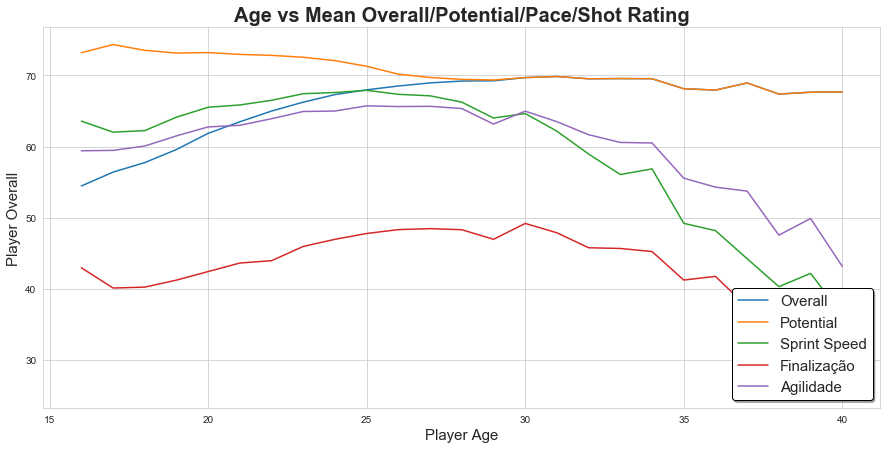

In [136]:
dataset40 = df.loc[df['Age'] <= 40]
idade = dataset40.sort_values("Age")['Age'].unique()
overall = dataset40.groupby("Age")["Overall"].mean().values
potential = dataset40.groupby("Age")["Potential"].mean().values
Sprint_Speed = dataset40.groupby("Age")["SprintSpeed"].mean().values
Finalização = dataset40.groupby("Age")["Finishing"].mean().values
Agilidade = dataset40.groupby("Age")["Agility"].mean().values

plt.figure()
plt.figure(figsize=(15,7))
plt.title('Age vs Mean Overall/Potential/Pace/Shot Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(idade, overall, label="Overall")
plt.plot(idade, potential, label="Potential")
plt.plot(idade,Sprint_Speed, label="Sprint Speed")
plt.plot(idade,Finalização, label="Finalização")
plt.plot(idade,Agilidade, label="Agilidade")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.savefig('chart.png')

Esse gráfico mostra a relação entre a idade do jogador com algumas habilidades escolhidas, assim como, overall, pontencial, sprint speed, finalizacao e agilidade. Para realizar esses dados, foi tirado uma média ponderada de cada habilidade para valores de jogadores com a mesma idade, tornando essa analise de habilidades, uma média de todos os jogadores do jogo. 

Como esperado, pode-se analisar que, com o passar dos anos, o overall dos jogadores vão aumentando e se aproximando cada vez mais à curva do potencial, dando uma estabilizada a partir dos 30 anos, idade em que os jogadores, em média, param de evoluir.

Também, é possível concluir que tanto a agilidade quanto a velocidade dos jogadores diminuem conforme aumenta a idade dos jogadores. Já para a finalizacao, a curva apresenta, um crescimento leve e depois tende a retornar ao valor medio inicial.

Para todas as habilidades escolhidas,a media tende a diminuir a partir dos 30 anos, o que mostra até quando os jogadores são esperados para manter seu overall o mais alto possível.

* Gráfico de habilidades dominantes por posição

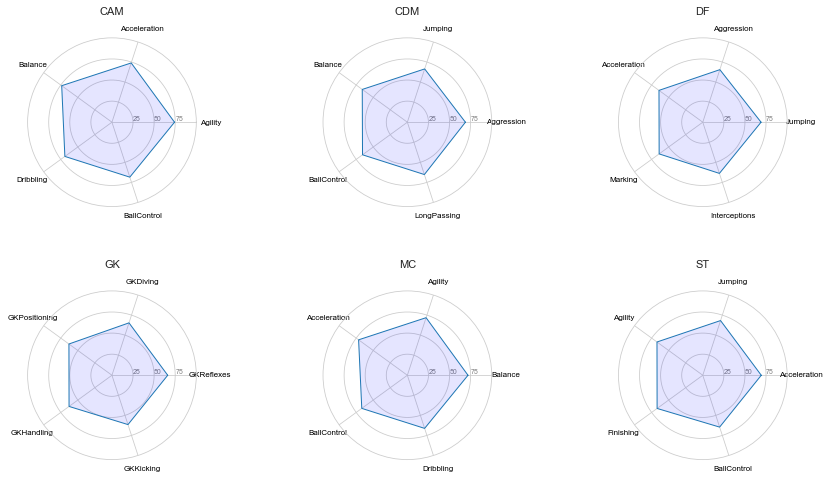

In [137]:
#códgio retirado do site: https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression/notebook

player_features = ('Acceleration', 'Aggression', 'Agility',
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties')

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Posição'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    #numero de variaveis
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    #Definindo a angulação de cada eixo
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #Plotando o gráfico
    ax = plt.subplot(10, 3, idx, polar=True)

    plt.xticks(angles[:-1], categories, color='black', size=8)
 
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    #Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    #Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

## Modelo de Predição

## Processo e estatistica de validação

## Conclusão

## Referências Bibliográficas

https://www.futhead.com/players/230666/

https://plotly.com/python/radar-chart/

https://www.kaggle.com/vibhavagarwal5/fifa-overall-positional-rating-prediction/comments